In [50]:
from __future__ import unicode_literals
from hazm import *
import json
from collections import Counter
import ipywidgets as widgets 
from IPython.display import display 
import matplotlib.pyplot as plt

plt.close("all")
import numpy as np
import pandas as pd
from numpy.random import randn

In [2]:
path_json = 'C:/Users/atb13/sample_data_homework.json'
fp = open(path_json, 'r', encoding='utf-8')
data = []
for line in fp:
    # خواندن خط به خط دیتا از فایل
    data_read = json.loads(line)
    # نرمالسازی توکن
    normalizer = Normalizer()
    norm = normalizer.normalize(data_read['Body'])
    # تبدیل متن خبر نرمال شده به توکن
    tokenizer = WordTokenizer()
    token = tokenizer.tokenize(norm)
    # ریشه یابی مبتنی بر قانون
    stem = []
    stemmer = Stemmer()
    for i in range(0, len(token)):
        stem.append(stemmer.stem(token[i]))

    # ذخیره متن خبر پیش پردازش شده
    data.append(stem)


In [3]:
# چاپ دیتای پیش پردازش شده
for i in range(0, len(data)):
    print('list data %i: %s' % (i, data[i]))
len(data)

list data 0: ['به', 'گزار', 'حوزه', 'قرآن', 'و', 'عتر', 'گروه', 'فرهنگ', 'باشگاه', 'خبرنگار', 'جو', '،', 'همز', 'با', 'آخرین', 'روز', 'سال', '۹۷', '،', 'مراس', 'معنو', 'اعتکاف', 'همچون', 'سال', 'گذشته', 'در', 'مساجد', 'کل', 'کشور', 'با', 'حضور', 'چشمگیر', 'جوان', 'آغاز', 'شد', '.', 'این', 'مراس', 'همز', 'با', 'روز', 'ولاد', 'حضر', 'عل', '(', 'ع', ')', 'و', 'با', 'حضور', 'پرشور', 'جوان', 'در', 'مساجد', '،', 'امامزادگ', 'و', 'بقاع', 'متبرکه', 'آغاز', 'شده_اس', 'و', 'تا', 'دو', 'فرودین\u200cماه', '۹۸', 'ادامه', 'خواهد_دا', '.', 'طبق', 'اعلا', 'ساز', 'تبلیغ', 'اسلام', '،', 'امسال', 'مراس', 'اعتکاف', 'در', '۳۱', 'اس', 'و', 'در', 'ب', 'از', '۴۶۰۰', 'مسجد', 'برگزار', 'می\u200cشود', '.', 'مرد', 'می\u200cتوانند', 'لحظه', 'سال', 'تحویل', 'را', 'طبق', 'هماهنگی', 'انجام\u200cشده', 'در', 'کنار', 'معتکفین', 'در', 'مساجد', 'باشند', '.', 'سن', 'حسنه', 'اعتکاف', 'یکی\u200cاز', 'رویش', 'انقلاب', 'اس', 'که', 'فرص', 'بازساز', '،', 'بازگ', 'به', 'دورن', 'و', 'بازنگر', 'به', 'اخلاق', 'و', 'رفتار', 'را', 'بر

10

In [4]:
# شمارش تعداد کلمات و ساخت posting list
dic_count = {}
posting_word = {}
for i in range(0, len(data)):
    count_word = Counter(data[i])
    print('count_word: ', count_word)
    for item in count_word:
        if item in dic_count:
            update_list = posting_word.get(item)
            update_list.append(i)
            posting_word[item] = update_list
            dic_count[item] = dic_count.get(item) + count_word.get(item)
        else:
            list_pos = []
            list_pos.append(i)
            posting_word[item] = list_pos
            dic_count[item] = count_word.get(item)


count_word:  Counter({'و': 11, 'در': 9, '.': 9, '،': 7, 'اعتکاف': 5, 'به': 4, 'با': 4, 'مراس': 4, 'مساجد': 4, 'این': 4, 'اس': 4, 'از': 4, 'سال': 3, 'حضور': 3, 'مسجد': 3, 'که': 3, 'برنامه': 3, 'همز': 2, 'روز': 2, 'جوان': 2, 'آغاز': 2, 'شده_اس': 2, 'طبق': 2, 'امسال': 2, 'برگزار': 2, 'را': 2, 'هماهنگی': 2, 'انجام\u200cشده': 2, 'جمله': 2, 'مقدس': 2, 'تما': 2, 'اماکن': 2, 'گزار': 1, 'حوزه': 1, 'قرآن': 1, 'عتر': 1, 'گروه': 1, 'فرهنگ': 1, 'باشگاه': 1, 'خبرنگار': 1, 'جو': 1, 'آخرین': 1, '۹۷': 1, 'معنو': 1, 'همچون': 1, 'گذشته': 1, 'کل': 1, 'کشور': 1, 'چشمگیر': 1, 'شد': 1, 'ولاد': 1, 'حضر': 1, 'عل': 1, '(': 1, 'ع': 1, ')': 1, 'پرشور': 1, 'امامزادگ': 1, 'بقاع': 1, 'متبرکه': 1, 'تا': 1, 'دو': 1, 'فرودین\u200cماه': 1, '۹۸': 1, 'ادامه': 1, 'خواهد_دا': 1, 'اعلا': 1, 'ساز': 1, 'تبلیغ': 1, 'اسلام': 1, '۳۱': 1, 'ب': 1, '۴۶۰۰': 1, 'می\u200cشود': 1, 'مرد': 1, 'می\u200cتوانند': 1, 'لحظه': 1, 'تحویل': 1, 'کنار': 1, 'معتکفین': 1, 'باشند': 1, 'سن': 1, 'حسنه': 1, 'یکی\u200cاز': 1, 'رویش': 1, 'انقلاب': 1, 'فرص'

In [5]:
# چاپ تعداد رخداد هر توکن
print('token : times')
for token in dic_count:
    print('( %s : %i )' % (token, dic_count.get(token)))

print('===================================================')

f = open("posting_word.txt","w" , encoding='utf-8')

f.write( str(posting_word) )

f.close()

# چاپ کلمات و postingهایشان
print('word: posting')
for word in posting_word:
    print('( %s : %s )' % (word, posting_word.get(word)))

print('===================================================')

token : times
( به : 123 )
( گزار : 12 )
( حوزه : 7 )
( قرآن : 1 )
( و : 189 )
( عتر : 1 )
( گروه : 13 )
( فرهنگ : 2 )
( باشگاه : 13 )
( خبرنگار : 20 )
( جو : 14 )
( ، : 123 )
( همز : 4 )
( با : 46 )
( آخرین : 1 )
( روز : 10 )
( سال : 32 )
( ۹۷ : 4 )
( مراس : 5 )
( معنو : 2 )
( اعتکاف : 5 )
( همچون : 3 )
( گذشته : 4 )
( در : 145 )
( مساجد : 4 )
( کل : 8 )
( کشور : 17 )
( حضور : 7 )
( چشمگیر : 3 )
( جوان : 4 )
( آغاز : 3 )
( شد : 13 )
( . : 119 )
( این : 83 )
( ولاد : 1 )
( حضر : 2 )
( عل : 2 )
( ( : 3 )
( ع : 1 )
( ) : 3 )
( پرشور : 1 )
( امامزادگ : 1 )
( بقاع : 1 )
( متبرکه : 1 )
( شده_اس : 9 )
( تا : 15 )
( دو : 4 )
( فرودین‌ماه : 1 )
( ۹۸ : 7 )
( ادامه : 5 )
( خواهد_دا : 2 )
( طبق : 4 )
( اعلا : 7 )
( ساز : 6 )
( تبلیغ : 1 )
( اسلام : 5 )
( امسال : 7 )
( ۳۱ : 1 )
( اس : 51 )
( ب : 12 )
( از : 80 )
( ۴۶۰۰ : 1 )
( مسجد : 3 )
( برگزار : 4 )
( می‌شود : 9 )
( مرد : 7 )
( می‌توانند : 1 )
( لحظه : 4 )
( تحویل : 2 )
( را : 70 )
( هماهنگی : 2 )
( انجام‌شده : 2 )
( کنار : 2 )
( معتکفین : 1 )


( مجر : [8] )
( شهاد : [8] )
( طلبانه : [8] )
( سلف : [8] )
( غزه : [8] )
( خط : [8] )
( مسیر : [8] )
( شهدا : [8] )
( نابلس : [8] )
( حمل : [8, 9] )
( وحشیانه : [8] )
( شبانگاه : [8] )
( رسیدند : [8] )
( نیرو : [8] )
( جبهه : [8] )
( وحد : [8] )
( یکپارچگ : [8] )
( حام : [8] )
( قادر : [8] )
( نخواهید_بود : [8] )
( تئوری : [8] )
( سلاح : [8] )
( سرد : [8] )
( گلوله : [8] )
( مدافع : [8] )
( مسجدالاقص : [8] )
( باد : [8] )
( خواهد_رف : [8] )
( اسرا : [8] )
( فرامو : [8] )
( نخواهد_کرد : [8] )
( همواره : [8] )
( راس : [8] )
( خواهند_دا : [8] )
( وبگرد : [9] )
( می‌رسد : [9] )
( دور : [9] )
( تازه : [9] )
( خواه : [9] )
( ایال : [9] )
( متحده : [9] )
( تو : [9] )
( باعث : [9] )
( برانگیخته : [9] )
( شدن : [9] )
( عصبان : [9] )
( دونالد : [9] )
( ترامپ : [9] )
( کرده : [9] )
( فیس : [9] )
( بوک : [9] )
( گوگل : [9] )
( حد : [9] )
( نمی‌دانند : [9] )
( جمهوریخواه : [9] )
( اجحاف : [9] )
( کنفرانس : [9] )
( مطبوعات : [9] )
( برزیل : [9] )
( شبکه : [9] )
( سخنان : [9] )
( بی‌رح : [9] )
( تبع

In [6]:
type(posting_word)

dict

In [7]:
#create dictionary 
word_set = [] 
for word in posting_word: 
      word_set.append(word) 
word_set = set(word_set) 
# print(word_set)

f2 = open("dictionary.txt","w" , encoding='utf-8')

f2.write( str(word_set) )

f2.close()
    
#save index for each word in dectionary
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1
# print(index_dict)

In [ ]:
# Second Program

In [8]:
with open('posting_word.txt', 'r' , encoding='utf-8') as content_file:
    posting_word = content_file.read()
    print(type(posting_word))

<class 'str'>


In [9]:
import ast
posting_word=ast.literal_eval(posting_word)
print(type(posting_word))

<class 'dict'>


In [10]:
with open('dictionary.txt', 'r' , encoding='utf-8') as content_file2:
    word_set = content_file2.read()
#     print(word_set)

In [11]:
word_set=ast.literal_eval(word_set)
print(type(word_set))

<class 'set'>


In [12]:
# Boolean Model

np.random.seed(110)
t = list(posting_word.values()) 
arr = [] 
arr = [i for i in range(len(data))]  
A=[] 
 
A = arr 
df = pd.DataFrame(0,posting_word.keys(),A) 
# in this "for" we check if a token exists in a document we put true otherwise false
for i in range(0,len(t)):
    df.loc[list(posting_word.keys())[i],A]=[a in list(posting_word.values())[i] for a in A] 
  

pd.set_option('display.max_rows', 1269)
pd.set_option('display.max_columns', 10)
df

,0,1,2,3,4,5,6,7,8,9
به,True,True,True,True,True,True,True,True,True,True
گزار,True,True,True,True,True,True,True,True,True,True
حوزه,True,False,False,False,True,False,True,False,False,False
قرآن,True,False,False,False,False,False,False,False,False,False
و,True,True,True,True,True,True,True,True,True,True
عتر,True,False,False,False,False,False,False,False,False,False
گروه,True,True,True,True,True,True,True,True,True,True
فرهنگ,True,False,False,False,False,True,False,False,False,False
باشگاه,True,True,True,True,True,True,True,True,True,True
خبرنگار,True,True,True,True,True,True,True,True,True,True


In [13]:
#Term Frequency 
def termfreq(document, word): 
    N = len(document) 
    occurance = len([token for token in document if token == word]) 
    return (occurance/N)+1

In [14]:
#Inverse Document Frequency 
  
def inverse_doc_freq(word): 
    if(dic_count.get(word)!=None):
        word_occurance = dic_count.get(word)
    else:   
         word_occurance = 1 
            
    return np.log(len(data)/word_occurance)

In [15]:
def tf_idf(sentence): 
    tf_idf_vec = [{}]
    for word in sentence: 
        tf = termfreq(sentence,word) 
        idf = inverse_doc_freq(word) 
          
        value = tf*idf 
        tf_idf_vec.append({"word":word,"value":value}) 
    return tf_idf_vec[1:]

In [16]:
#TF-IDF Encoded text corpus 

vectors = [] 

df3 = pd.DataFrame(0,posting_word.keys(),A)  
for i in range(0,len(data)): 
    vec = tf_idf(data[i])
    for token in vec:
        df3.loc[token["word"],i]=token["value"]
        
# tf_idf_model=df3.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
tf_idf_model=df3

tf_idf_model

,0,1,2,3,4,5,6,7,8,9
به,-2.558094,-2.573620,-2.628163,-2.562270,-2.580973,-2.569352,-2.620022,-2.593720,-2.603945,-2.579896
گزار,-0.183202,-0.183252,-0.183039,-0.182547,-0.182656,-0.183190,-0.183051,-0.182661,-0.183692,-0.182832
حوزه,0.358398,0.000000,0.000000,0.000000,0.358311,0.000000,0.358102,0.000000,0.000000,0.000000
قرآن,2.313709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
و,-3.095349,-2.969153,-2.985448,-3.091563,-3.114433,-3.051130,-3.044972,-3.097888,-3.049657,-3.037957
عتر,2.313709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
گروه,-0.263632,-0.263034,-0.263397,-0.262688,-0.263327,-0.263614,-0.263414,-0.262853,-0.264337,-0.263099
فرهنگ,1.617213,0.000000,0.000000,0.000000,0.000000,1.617102,0.000000,0.000000,0.000000,0.000000
باشگاه,-0.263632,-0.263034,-0.263397,-0.262688,-0.263327,-0.263614,-0.263414,-0.262853,-0.264337,-0.263099
خبرنگار,-0.696496,-0.694915,-0.698605,-0.694003,-0.698234,-0.699749,-0.698692,-0.694438,-0.698359,-0.695089


رویترز نتانیاهو صهیونیست هک گانتس سخنران این مطالب الکی است
[['رویترز', 'نتانیاهو', 'هک', 'گانتس', 'این', 'اس']]
[{'value': array([[0.16433853]]), 'DocId': 1}
 {'value': array([[0.10126533]]), 'DocId': 5}
 {'value': array([[0.0990478]]), 'DocId': 6}
 {'value': array([[0.09640837]]), 'DocId': 0}
 {'value': array([[0.08847359]]), 'DocId': 2}
 {'value': array([[0.08039862]]), 'DocId': 9}]


C:\Users\atb13\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


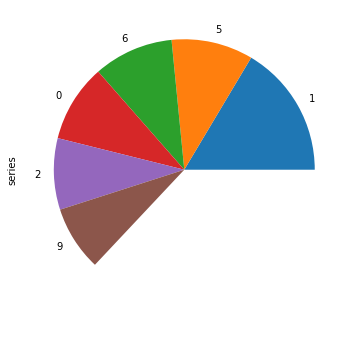

In [83]:

textBox=widgets.Text( 
value= '', 
placeholder='Enter your query', 
Description='', 
disabled=False 
) 
button = widgets.Button(description="Search") 
 
Box = widgets.HBox([textBox, button]) 
 
textValue ='' 
cosine_sim=[]
def on_button_clicked(b): 
    global textValue 
    textValue=textBox.value 
    print(textValue) 
    query=[] 
    #value is accesible now! 
    normalizer = Normalizer() 
    norm = normalizer.normalize(textValue) 
    # print('norm: ', norm) 
    # تبدیل متن خبر نرمال شده به توکن 
    tokenizer = WordTokenizer() 
    token = tokenizer.tokenize(norm) 
    # print('token: ', token) 
    # ریشه یابی مبتنی بر قانون 
    stem = [] 
    stemmer = Stemmer() 
    for i in range(0, len(token)):
        stemWord=stemmer.stem(token[i]);
        if(stemWord in word_set):
             stem.append(stemWord) 
    # print('stem: ', stem) 
 
    # ذخیره متن خبر پیش پردازش شده 
    query.append(stem) 
    print(query) 
    #TF-IDF Encoded text corpus 
 
    vectors2 = [] 
    A=['Query']
    query_model = pd.DataFrame(0,posting_word.keys(),A)  
    for token in query:
        term=tf_idf(token)
        for t in term:
            query_model.loc[t["word"],A]=t["value"]
                
#     tf_idf_query_model=query_model.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    tf_idf_query_model=query_model
#     print(tf_idf_query_model)
   
    from sklearn.metrics.pairwise import cosine_similarity 
    for i in range(0,len(data)):
        x = np.array(tf_idf_model[i]).reshape(1,-1)
        y = np.array(tf_idf_query_model['Query']).reshape(1,-1)
        cosine_sim.append({"value":(cosine_similarity(x, y)),"DocId":i})
#     print(cosine_sim)
#     print(cosine_sim.sort(key=lambda tup: tup[1])) 
    newlist = np.array(sorted(cosine_sim, key=lambda d: d['value'], reverse=True) )
    newlistValues=[]
    newlistindexes=[]
    print(newlist[:6])
    for tk in newlist[:6]:
        newlistValues.append(tk['value'][0][0])
        newlistindexes.append(tk['DocId'])
#     print(newlistValues)    
    series = pd.Series(newlistValues, index=newlistindexes, name="series")

    series.plot.pie(figsize=(6, 6));
#     for simNum in newlist:
#         print(simNum)
button.on_click(on_button_clicked) 
Box

In [19]:
def get_posting_list(word) :
    given_value = word
    p1 = posting_word.get(word)      
    return p1


In [20]:
def intersection(p1,p2):
    if p1 is not None and p2 is not None:
        intersection = list(set(p1) & set(p2)) 
        return intersection
    else:
        return []

#==============================================================================
# PostingList Union
#==============================================================================
def union(p1,p2):
    if p1 is not None and p2 is not None: 
        return list(set().union(p1,p2))
    else:
        return []
    
#==============================================================================
# PostingList Negation
#==============================================================================
def NOT(p1,p2):
    if p1 is not None and p2 is not None:
        return list(set(p1) - set(p2))
    else:
        return []

In [21]:
def query_handler(query,posting_word):
    
    print(query)
    queryB=[]
    normalizer = Normalizer()
    norm = normalizer.normalize(query)
#     تبدیل متن خبر نرمال شده به توکن
    tokenizer = WordTokenizer()
    token = tokenizer.tokenize(norm)
    # print('token: ', token)
    # ریشه یابی مبتنی بر قانون
    stem = []
    stemmer = Stemmer()
    for i in range(0, len(token)):
        stem.append(stemmer.stem(token[i]))

    query = query.split(" ")
    term = query[0]
    posting = get_posting_list(stemmer.stem(term))
    documents = posting
    for index in range(1,len(query)):
        if(query[index] == "AND"):
            op = '&'

        elif(query[index]== "OR"):
            op = '||'
        elif(query[index]== "NOT"):
            op = '!'
        else:
            if(op == '&'):
                term = normalizer.normalize(query[index])
                term = stemmer.stem(term)
                term = get_posting_list(term)
                documents = intersection(documents,term)
            elif(op == '||'):
                term = normalizer.normalize(query[index])
                term = stemmer.stem(term)
                term = get_posting_list(term)
                documents = union(documents,term)
            elif(op == '!'):
                term = normalizer.normalize(query[index])
                term = stemmer.stem(term)
                term = get_posting_list(term)
                documents = list(set(documents) - set(term))
    return documents

In [22]:
import ipywidgets as widgets
from IPython.display import display
textBox=widgets.Text(
value= '',
placeholder='Enter your query',
Description='',
disabled=False
)
button = widgets.Button(description="Search")

Box = widgets.HBox([textBox, button])

textValue =''

def on_button_clicked2(b):
    global textValue
    textValue=textBox.value
    print(textValue)
    results = query_handler(textValue,posting_word)
    print('result is: ',results)                
    
button.on_click(on_button_clicked2)
Box

گزارش AND به NOT نتانیاهو
گزارش AND به NOT نتانیاهو
result is:  [0, 2, 3, 4, 5, 6, 7, 8, 9]
